### Import important libraries

In [ ]:
# https://www.kaggle.com/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews/data

In [1]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM, Dropout
from keras.models import Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import dataset

In [2]:
data = pd.read_csv("IMDB Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Understanding & Preparing Data

In [3]:
data.shape

(50000, 2)

In [4]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
import re
from nltk.corpus import stopwords

texts = data["review"]
english_stops = set(stopwords.words('english'))

texts = texts.replace({'<.*?>': ''}, regex = True)          # remove html tag
texts = texts.replace({'[^A-Za-z]': ' '}, regex = True)     # remove non alphabet
texts = texts.apply(lambda review: [w for w in review.split() if w not in english_stops])  # remove stop words
texts = texts.apply(lambda review: " ".join([w.lower() for w in review]))   # lower case
texts

0        one reviewers mentioned watching oz episode ho...
1        a wonderful little production the filming tech...
2        i thought wonderful way spend time hot summer ...
3        basically family little boy jake thinks zombie...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    i thought movie right good job it creative ori...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i catholic taught parochial elementary schools...
49998    i going disagree previous comment side maltin ...
49999    no one expects star trek movies high art fans ...
Name: review, Length: 50000, dtype: object

In [6]:
maxlen = 130
maxlen

130

In [7]:
texts = np.asarray(texts)
labels = np.asarray(data["sentiment"].map({"positive": 0, "negative": 1}))
texts

array(['one reviewers mentioned watching oz episode hooked they right exactly happened the first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid this show pulls punches regards drugs sex violence its hardcore classic use word it called oz nickname given oswald maximum security state penitentary it focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away i would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around the first episode i ever saw struck nasty surreal i say i ready i watched i developed taste oz got accustomed high levels graphic violence not violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class 

In [8]:
len(texts[1])

679

In [9]:
from collections import Counter
Counter(labels)

Counter({0: 25000, 1: 25000})

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000,)
(10000,)
(40000,)
(10000,)


In [11]:
X_train

array(['ok first may spoiler since know constitutes giving much information my subject line says surely people want know why stupid first film follows bunch yuppies go sports game chicago wind taking wrong exit winding ghetto scary huh well first emilio driving everyone world overblown rv winnebago tricked satellite dishes crap like so guys going sports game forget though likely bulls white sox since near oh scary ghetto yet even make freeway without onboard viewing command center would put espn shame yet smart enough earn livings would pay stuff sports fans even know exit get way game love i gave movie within half hour reasons plentiful they wind in the ghetto yet main danger existence denis leary a white guy i racist come on in anything resembling reality film was trying urban nightmare denis leary would trying kill emilio estevez hitching ride get f dodge this easily one dumbest movies ever created although i familiar much rest world cinema if mst k still surely would devoted episod

### Tokenize

In [12]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)

In [13]:
tokenizer.fit_on_texts(X_train)
sequences1 = tokenizer.texts_to_sequences(X_test)

In [14]:
word_index = tokenizer.word_index
print("Found {0} unique words".format(len(word_index)))

Found 92437 unique words


In [15]:
word_index

{'i': 1,
 'the': 2,
 'movie': 3,
 'film': 4,
 'one': 5,
 'like': 6,
 'it': 7,
 'this': 8,
 'good': 9,
 'time': 10,
 'even': 11,
 'would': 12,
 'story': 13,
 'really': 14,
 'see': 15,
 'well': 16,
 'much': 17,
 'bad': 18,
 'get': 19,
 'people': 20,
 'great': 21,
 'also': 22,
 'first': 23,
 'made': 24,
 'make': 25,
 'way': 26,
 'could': 27,
 'movies': 28,
 'but': 29,
 'characters': 30,
 'think': 31,
 'and': 32,
 'character': 33,
 'watch': 34,
 'films': 35,
 'two': 36,
 'many': 37,
 'seen': 38,
 'a': 39,
 'love': 40,
 'plot': 41,
 'acting': 42,
 'life': 43,
 'never': 44,
 'show': 45,
 'know': 46,
 'best': 47,
 'little': 48,
 'there': 49,
 'in': 50,
 'ever': 51,
 'man': 52,
 'better': 53,
 'end': 54,
 'if': 55,
 'scene': 56,
 'say': 57,
 'still': 58,
 'he': 59,
 'scenes': 60,
 'something': 61,
 'go': 62,
 'back': 63,
 'real': 64,
 'watching': 65,
 'thing': 66,
 'actors': 67,
 'director': 68,
 'years': 69,
 'though': 70,
 'funny': 71,
 'old': 72,
 'another': 73,
 'work': 74,
 'actually': 75

In [16]:
max_features = 15000
max_features

15000

### Padding Sequences

In [17]:
X_train = pad_sequences(sequences, maxlen=maxlen)
X_train.shape

(40000, 130)

In [18]:
X_test = pad_sequences(sequences1, maxlen=maxlen)
X_test.shape

(10000, 130)

### RNN

In [19]:
rnn = Sequential()
rnn.add(Embedding(max_features, 32, input_length=maxlen))
rnn.add(SimpleRNN(16, input_shape = (max_features, maxlen), return_sequences=False, activation="relu"))
rnn.add(Dense(1, activation="sigmoid"))

rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 32)           480000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________


In [20]:
rnn.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
hist_rnn = rnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=128, verbose=1)

Epoch 1/15
313/313 [==============================] - 34s 102ms/step - loss: 0.4604 - accuracy: 0.7713 - val_loss: 0.2835 - val_accuracy: 0.8837
Epoch 2/15
313/313 [==============================] - 32s 102ms/step - loss: 0.2515 - accuracy: 0.9004 - val_loss: 0.2795 - val_accuracy: 0.8894
Epoch 3/15
313/313 [==============================] - 32s 102ms/step - loss: 0.2064 - accuracy: 0.9196 - val_loss: 0.2711 - val_accuracy: 0.8916
Epoch 4/15
313/313 [==============================] - 32s 102ms/step - loss: 0.1801 - accuracy: 0.9310 - val_loss: 0.2801 - val_accuracy: 0.8906
Epoch 5/15
313/313 [==============================] - 32s 103ms/step - loss: 0.1613 - accuracy: 0.9387 - val_loss: 0.3175 - val_accuracy: 0.8768
Epoch 6/15
313/313 [==============================] - 32s 103ms/step - loss: 0.1473 - accuracy: 0.9445 - val_loss: 0.3131 - val_accuracy: 0.8838
Epoch 7/15
313/313 [==============================] - 32s 102ms/step - loss: 0.1363 - accuracy: 0.9489 - val_loss: 0.3299 - val_ac

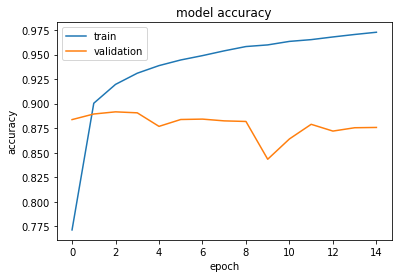

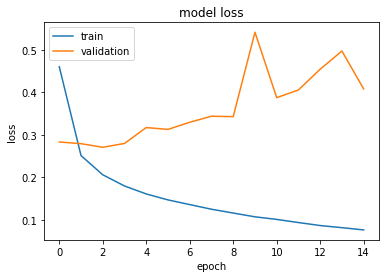

In [21]:
#  "Accuracy"
plt.plot(hist_rnn.history['accuracy'])
plt.plot(hist_rnn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist_rnn.history['loss'])
plt.plot(hist_rnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
rnn1 = Sequential()
rnn1.add(Embedding(max_features, 32, input_length=maxlen))
rnn1.add(SimpleRNN(64, input_shape = (max_features, maxlen), return_sequences=False, activation="relu"))
rnn1.add(Dropout(0.25))
rnn1.add(Dense(1, activation="sigmoid"))

rnn1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 130, 32)           480000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                6208      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 486,273
Trainable params: 486,273
Non-trainable params: 0
_________________________________________________________________


In [23]:
rnn1.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
hist_rnn = rnn1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=128, verbose=1)

Epoch 1/15
313/313 [==============================] - 33s 103ms/step - loss: 0.5230 - accuracy: 0.7650 - val_loss: 0.3474 - val_accuracy: 0.8632
Epoch 2/15
313/313 [==============================] - 32s 103ms/step - loss: 0.2833 - accuracy: 0.8918 - val_loss: 0.4551 - val_accuracy: 0.8764
Epoch 3/15
313/313 [==============================] - 32s 104ms/step - loss: 0.2345 - accuracy: 0.9122 - val_loss: 0.3084 - val_accuracy: 0.8809
Epoch 4/15
313/313 [==============================] - 33s 105ms/step - loss: 0.2047 - accuracy: 0.9250 - val_loss: 0.3855 - val_accuracy: 0.8555
Epoch 5/15
313/313 [==============================] - 32s 103ms/step - loss: 0.1888 - accuracy: 0.9321 - val_loss: 0.3312 - val_accuracy: 0.8862
Epoch 6/15
313/313 [==============================] - 32s 104ms/step - loss: 0.1711 - accuracy: 0.9384 - val_loss: 0.3067 - val_accuracy: 0.8783
Epoch 7/15
313/313 [==============================] - 33s 104ms/step - loss: 0.1595 - accuracy: 0.9423 - val_loss: 0.4155 - val_ac

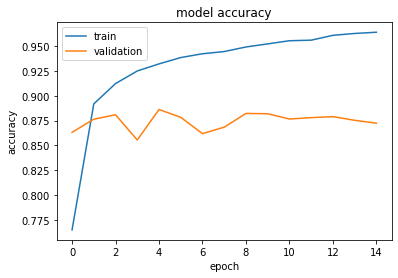

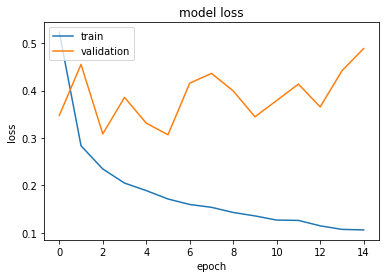

In [24]:
#  "Accuracy"
plt.plot(hist_rnn.history['accuracy'])
plt.plot(hist_rnn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist_rnn.history['loss'])
plt.plot(hist_rnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [25]:
rnn2 = Sequential()
rnn2.add(Embedding(max_features, 32, input_length=maxlen))
rnn2.add(SimpleRNN(128, input_shape = (max_features, maxlen), return_sequences=False, activation="relu"))
rnn2.add(Dropout(0.3))
rnn2.add(Dense(1, activation="sigmoid"))

rnn2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 130, 32)           480000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 128)               20608     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 500,737
Trainable params: 500,737
Non-trainable params: 0
_________________________________________________________________


In [26]:
rnn2.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
hist_rnn = rnn2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=128, verbose=1)

Epoch 1/15
313/313 [==============================] - 40s 126ms/step - loss: 7.4370 - accuracy: 0.7035 - val_loss: 0.4904 - val_accuracy: 0.7768
Epoch 2/15
313/313 [==============================] - 39s 126ms/step - loss: 1.4479 - accuracy: 0.8600 - val_loss: 0.3568 - val_accuracy: 0.8528
Epoch 3/15
313/313 [==============================] - 39s 126ms/step - loss: 0.2979 - accuracy: 0.8881 - val_loss: 0.3205 - val_accuracy: 0.8737
Epoch 4/15
313/313 [==============================] - 39s 126ms/step - loss: 0.2707 - accuracy: 0.9058 - val_loss: 0.3827 - val_accuracy: 0.8507
Epoch 5/15
313/313 [==============================] - 40s 126ms/step - loss: 0.2300 - accuracy: 0.9170 - val_loss: 0.3982 - val_accuracy: 0.8525
Epoch 6/15
313/313 [==============================] - 40s 127ms/step - loss: 0.2111 - accuracy: 0.9247 - val_loss: 0.3036 - val_accuracy: 0.8828
Epoch 7/15
313/313 [==============================] - 40s 127ms/step - loss: 0.1926 - accuracy: 0.9309 - val_loss: 0.3836 - val_ac

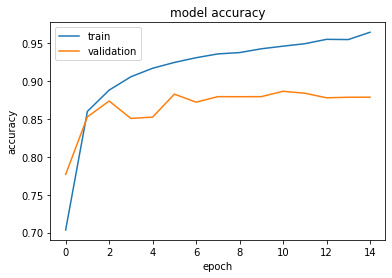

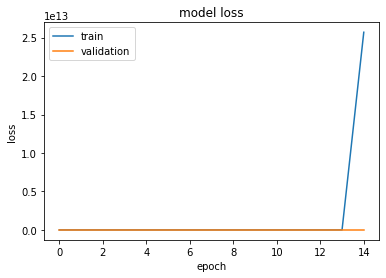

In [27]:
#  "Accuracy"
plt.plot(hist_rnn.history['accuracy'])
plt.plot(hist_rnn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist_rnn.history['loss'])
plt.plot(hist_rnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [28]:
preds_rnn = rnn2.predict(X_test)

In [29]:
preds_final = preds_rnn.round()
preds_final

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc_rnn = accuracy_score(y_test, preds_final)
confusion_rnn = confusion_matrix(y_test, preds_final)
clasrep_rnn = classification_report(y_test, preds_final)

print(acc_rnn)
print(confusion_rnn)
print(clasrep_rnn)

0.8788
[[4391  630]
 [ 582 4397]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      5021
           1       0.87      0.88      0.88      4979

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [31]:
rnn3 = Sequential()
rnn3.add(Embedding(max_features, 32, input_length=maxlen))
rnn3.add(SimpleRNN(512))
rnn3.add(Dropout(0.4))
rnn3.add(Dense(1, activation="sigmoid"))

rnn3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 130, 32)           480000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 512)               279040    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 759,553
Trainable params: 759,553
Non-trainable params: 0
_________________________________________________________________


In [32]:
rnn3.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
hist_rnn = rnn3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=128, verbose=1)

Epoch 1/25
313/313 [==============================] - 42s 133ms/step - loss: 0.8173 - accuracy: 0.4972 - val_loss: 0.6986 - val_accuracy: 0.4979
Epoch 2/25
313/313 [==============================] - 42s 133ms/step - loss: 0.6781 - accuracy: 0.6051 - val_loss: 0.6034 - val_accuracy: 0.7564
Epoch 3/25
313/313 [==============================] - 42s 134ms/step - loss: 0.5107 - accuracy: 0.7595 - val_loss: 0.5268 - val_accuracy: 0.7965
Epoch 4/25
313/313 [==============================] - 42s 133ms/step - loss: 0.4649 - accuracy: 0.7946 - val_loss: 0.4356 - val_accuracy: 0.8182
Epoch 5/25
313/313 [==============================] - 42s 134ms/step - loss: 0.4632 - accuracy: 0.7969 - val_loss: 0.4311 - val_accuracy: 0.8153
Epoch 6/25
313/313 [==============================] - 42s 133ms/step - loss: 0.4205 - accuracy: 0.8243 - val_loss: 0.4621 - val_accuracy: 0.8029
Epoch 7/25
313/313 [==============================] - 42s 133ms/step - loss: 0.3845 - accuracy: 0.8438 - val_loss: 0.6191 - val_ac

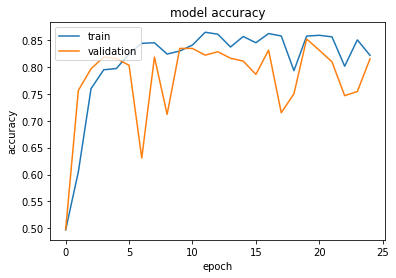

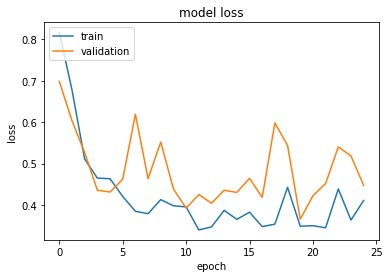

In [33]:
#  "Accuracy"
plt.plot(hist_rnn.history['accuracy'])
plt.plot(hist_rnn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist_rnn.history['loss'])
plt.plot(hist_rnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [34]:
preds_rnn = rnn3.predict(X_test)

In [35]:
preds_final = preds_rnn.round()
preds_final

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc_rnn = accuracy_score(y_test, preds_final)
confusion_rnn = confusion_matrix(y_test, preds_final)
clasrep_rnn = classification_report(y_test, preds_final)

print(acc_rnn)
print(confusion_rnn)
print(clasrep_rnn)

0.815
[[4478  543]
 [1307 3672]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83      5021
           1       0.87      0.74      0.80      4979

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000



### LSTM

In [41]:
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 32, input_length = maxlen))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 130, 32)           2958016   
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,982,913
Trainable params: 2,982,913
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 128, epochs = 5, verbose=1)

Epoch 1/5
313/313 [==============================] - 6s 10ms/step - loss: 0.3792 - accuracy: 0.8212
Epoch 2/5
313/313 [==============================] - 3s 10ms/step - loss: 0.1679 - accuracy: 0.9380
Epoch 3/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0901 - accuracy: 0.9696
Epoch 4/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0522 - accuracy: 0.9836
Epoch 5/5
313/313 [==============================] - 3s 10ms/step - loss: 0.0383 - accuracy: 0.9877


In [47]:
preds_rnn = model.predict(X_test)

In [48]:
preds_final = preds_rnn.round()
preds_final

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [49]:
acc_rnn = accuracy_score(y_test, preds_final)
confusion_rnn = confusion_matrix(y_test, preds_final)
clasrep_rnn = classification_report(y_test, preds_final)

print(acc_rnn)
print(confusion_rnn)
print(clasrep_rnn)

0.8668
[[4142  879]
 [ 453 4526]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      5021
           1       0.84      0.91      0.87      4979

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

